# DeepPurpose Modeling on DAVIS and KiBA benchmark datasets
By Andrea Wey, Christian Pala and Carlo Grigioni

## Libraries:

In [1]:
from DeepPurpose.utils import *
from DeepPurpose import utils, dataset
from DeepPurpose import DTI as models
import warnings
warnings.filterwarnings("ignore")

### Download the two datasets from DeepPurpose

In [2]:
X_drugs_davis, X_targets_davis, y_davis = dataset.load_process_DAVIS(path = './data', binary = False, threshold = 30)

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


In [3]:
X_drugs_kiba, X_targets_kiba, y_kiba = dataset.load_process_KIBA(path = './data', binary = False, threshold = 30)

Beginning Processing...
Beginning to extract zip file...
Done!


## Evaluation routine
We use a similar split to the BindingDB dataset.

In [4]:
def train_model_encoding(encoding, drugs, targets, y):
    drug_encoding, target_encoding = encoding, 'CNN'

    train, val, test = utils.data_process(drugs, targets, y,
                                drug_encoding, target_encoding, 
                                split_method='cold_protein',frac=[0.7,0.1,0.2],
                                random_seed = 1)

    config = utils.generate_config(drug_encoding = drug_encoding, 
                        target_encoding = target_encoding, 
                        cls_hidden_dims = [1024,1024,512], 
                        train_epoch = 5, 
                        LR = 0.001, 
                        batch_size = 128,
                        hidden_dim_drug = 128,
                        mpnn_hidden_size = 128,
                        mpnn_depth = 3, 
                        cnn_target_filters = [32,64,96],
                        cnn_target_kernels = [4,8,12]
                        )
        

    model = models.model_initialize(**config)
    model.train(train, val, test)

    f= open(os.path.join(model.result_folder, 'test_markdowntable.txt'),'r')
    dummy_results = f.read()

    print("encoding: " + encoding)
    print(str(dummy_results))

    return dummy_results

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.7186. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.49913. Total time 0.00583 hours
Validation at Epoch 1 with loss:0.08421, MSE: 0.37425 , Pearson Correlation: 0.52421 with p-value: 2.14E-182 , Concordance Index: 0.79508
Training at Epoch 2 iteration 0 with loss 0.79805. Total time 0.01111 hours
Training at Epoch 2 iteration 100 with loss 0.51868. Total time 0.01638 hours
Validation at Epoch 2 with loss:0.27430, MSE: 0.38812 , Pearson Correlation: 0.54547 with p-value: 2.77E-200 , Concordance Index: 0.80456
Training at Epoch 3 iteration 0 with loss 0.61510. Total time 0.02138 hours
Training at Epoch 3 iteration 100 with loss 0.59517. Total time 0.02722 hours
Validation

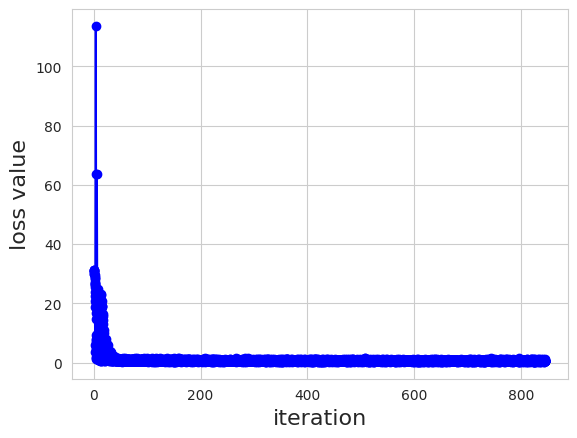

In [5]:
encodings = ['Morgan', 'Pubchem', 'Daylight', 'rdkit_2d_normalized', 'CNN', 'CNN_RNN', 'Transformer', 'MPNN' ]

drugs, targets, y = X_drugs_davis, X_targets_davis, y_davis # select the dataset
#drugs, targets, y = X_drugs_kiba, X_targets_kiba, y_kiba

encoding_results = {encoding:[] for encoding in encodings}

for encoding in encodings:
    try: 
        res = train_model_encoding(encoding, drugs, targets, y)
        encoding_results[encoding] = res
    except Exception as e:
        print("encoding: " + encoding)
        print(str(e))
        encoding_results[encoding] = str(e)
        continue


In [6]:
for result in encodings:
    print ("encoding: " + result)
    print(str(encoding_results[result]))

encoding: Morgan
+--------+---------------------+--------------+-------------------+
|  MSE   | Pearson Correlation | with p-value | Concordance Index |
+--------+---------------------+--------------+-------------------+
| 0.6141 |        0.5878       |    0.0000    |       0.7829      |
+--------+---------------------+--------------+-------------------+
encoding: Pubchem
+--------+---------------------+--------------+-------------------+
|  MSE   | Pearson Correlation | with p-value | Concordance Index |
+--------+---------------------+--------------+-------------------+
| 0.6388 |        0.5745       |    0.0000    |       0.7796      |
+--------+---------------------+--------------+-------------------+
encoding: Daylight
+--------+---------------------+--------------+-------------------+
|  MSE   | Pearson Correlation | with p-value | Concordance Index |
+--------+---------------------+--------------+-------------------+
| 0.6362 |        0.5871       |    0.0000    |       0.7829  

We were interested in particular in the CNN + CNN combination, so below we perform it for KiBA separately.

Drug Target Interaction Prediction Mode...
in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
encoding protein...
unique target sequence: 229
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 135.692. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.90286. Total time 0.00722 hours
Training at Epoch 1 iteration 200 with loss 0.66405. Total time 0.015 hours
Training at Epoch 1 iteration 300 with loss 0.69241. Total time 0.02222 hours
Training at Epoch 1 iteration 400 with loss 0.77835. Total time 0.02972 hours
Training at Epoch 1 iteration 500 with loss 0.67149. Total time 0.03722 hours
Training at Epoch 1 iteration 600 with loss 0.71613. Total time 0.04444 hours
Validation at Epoch 1 with loss:0.65990, MSE: 0.68994 , Pearson Correlation: 0.37961 with p-value: 0.00E+00 , Concordance Index: 0.61899
Training at Epoch 2 iteration 0 with loss 0.59075. Total time 0.05527 

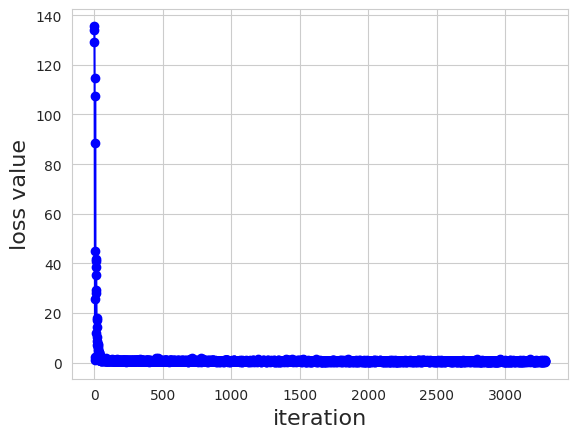

In [7]:
drugs, targets, y = X_drugs_kiba, X_targets_kiba, y_kiba

encoding_results = {encoding:[] for encoding in encodings}

encodings = ['CNN']


for encoding in encodings:
    try:
        res = train_model_encoding(encoding, drugs, targets, y)
        encoding_results[encoding] = res
    except Exception as e:
        print("encoding: " + encoding)
        print(str(e))
        encoding_results[encoding] = str(e)
        continue